# Severity Prediction Model - Data Approach To Risk Control

# 1.0 Introduction

## 1.1 Background
#### In the last 5 years Seattle have seen increase in fatal accidents and accidents with Serius Injury. Traffic accidents since 2014 and 2015 have increased in the number of fatalities and serius injury despite improvement that the city have from 2010. This situation impose problems for Insurance industry to maintain economical premium. If not interviene Insurance company may be forced to adjust the premium up for customer living or commuting in Seattle in which it is a lose-lose situation for both Insurance Industry and community as a whole.

In [2]:
!pip install tabula-py

     |████████████████████████████████| 11.7MB 5.2MB/s eta 0:00:01
     |████████████████████████████████| 10.5MB 16.5MB/s eta 0:00:01
ERROR: ibm-watson-machine-learning 1.0.10 has requirement pandas<=0.25.3, but you'll have pandas 1.1.2 which is incompatible.
ERROR: autoai-libs 1.10.5 has requirement numpy>=1.16.4, but you'll have numpy 1.15.4 which is incompatible.
  Found existing installation: pandas 0.24.1
    Uninstalling pandas-0.24.1:
      Successfully uninstalled pandas-0.24.1


--2020-09-12 11:44:35--  https://remoteapps.wsdot.wa.gov/HighwaySafety/Collision/Data/Portal/Public/PublicReport/TenYearSummary
Resolving remoteapps.wsdot.wa.gov (remoteapps.wsdot.wa.gov)... 198.238.212.58
Connecting to remoteapps.wsdot.wa.gov (remoteapps.wsdot.wa.gov)|198.238.212.58|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 107232 (105K) [application/pdf]
Saving to: ‘TenYearSummary.pdf’

100%[======================================>] 107,232     --.-K/s   in 0.09s   

2020-09-12 11:44:39 (1.12 MB/s) - ‘TenYearSummary.pdf’ saved [107232/107232]



'pages' argument isn't specified.Will extract only from page 1 by default.


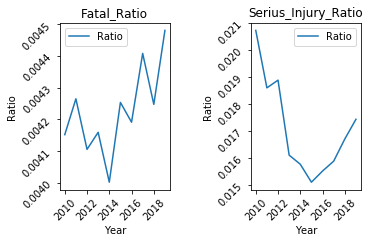

In [6]:
# Background issue analysis
from tabula import read_pdf, convert_into
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
#Fetch Report from Washington State Departement Of Transportation
!wget -O TenYearSummary.pdf https://remoteapps.wsdot.wa.gov/HighwaySafety/Collision/Data/Portal/Public/PublicReport/TenYearSummary

#Handle Washington State Departement Of Transportation report on accident
convert_into("TenYearSummary.pdf","TenYearSummary.csv",output_format="csv")
df_sum = pd.read_csv("TenYearSummary.csv")
df_sum.rename(columns={"Unnamed: 0":"Year","Unnamed: 1":"Total Crashes", "Unnamed: 3":"Fatal", "Unnamed: 4":"Suspected Serious Injury","Unnamed: 5":"Suspected Minor Injury","Unnamed: 6":"Possible Injury","Unnamed: 7":"No Apparent Injury","Drinking Driver":"Drinking Driver Involved Crashes","Teen Driver":"Teen Driver Involved Crashes"}, inplace=True)
df_sum.drop([0, 1], inplace=True)
df_sum.drop([12, 12], inplace=True)
df_sum.drop(columns=["Unnamed: 2"], inplace=True)
df_sum.reset_index(drop=True)
df_sum.set_index('Year', inplace=True)
df_sum['Total Crashes'] = df_sum['Total Crashes'].str.replace(',','').astype(float)
df_sum['Suspected Serious Injury'] = df_sum['Suspected Serious Injury'].str.replace(',','').astype(float)
df_sum['Suspected Minor Injury'] = df_sum['Suspected Minor Injury'].str.replace(',','').astype(float)
df_sum['Possible Injury'] = df_sum['Possible Injury'].str.replace(',','').astype(float)
df_sum['No Apparent Injury'] = df_sum['No Apparent Injury'].str.replace(',','').astype(float)
df_sum['Drinking Driver Involved Crashes'] = df_sum['Drinking Driver Involved Crashes'].str.replace(',','').astype(float)
df_sum['Teen Driver Involved Crashes'] = df_sum['Teen Driver Involved Crashes'].str.replace(',','').astype(float)
df_sum['Fatal_Ratio'] = df_sum['Fatal']/df_sum['Total Crashes'] 
df_sum['Serius_Injury_Ratio'] = df_sum['Suspected Serious Injury']/df_sum['Total Crashes'] 
df_sum['minor_injury_Ratio'] = df_sum['Suspected Minor Injury']/df_sum['Total Crashes']     
    
#Plot Analysis
fig, (ax1,ax2) = plt.subplots(1,2)
fig.tight_layout(pad=5.0)
ax1.plot(df_sum['Fatal_Ratio'], label='Ratio')
ax1.set_xlabel('Year') 
ax1.set_ylabel('Ratio')
ax1.set_title("Fatal_Ratio")
ax1.legend()
ax1.tick_params(labelrotation=45)
ax1.xaxis.set_major_locator(plt.MaxNLocator(5))
ax2.plot(df_sum['Serius_Injury_Ratio'], label='Ratio')
ax2.set_xlabel('Year') 
ax2.set_ylabel('Ratio')
ax2.set_title("Serius_Injury_Ratio")
ax2.legend()
ax2.tick_params(labelrotation=45)
ax2.xaxis.set_major_locator(plt.MaxNLocator(5))

## 1.2 Problem
#### Data that can provide indication whether a Traffic accident, such data 